1. {\bf Tensores y SymPy}

SymPy contiene un módulo para hacer manipulación simbólica con objetos con índices y se llama "sympy.tensor.tensor". 

Para más información: \url{https://docs.sympy.org/latest/modules/tensor/tensor.html#}

In [3]:
import sympy
from sympy import *
from sympy.tensor.tensor import *
init_printing()

Empezamos definiendo un tensor métrico abstracto 

In [4]:
gij = TensorIndexType('gij',dim=3,metric_name='g',metric_symmetry = 1, dummy_name='g')
gij.metric
i, j,k,l = tensor_indices('i,j,k,l', gij)
g = gij.metric

In [5]:
g(i,j)

La $\delta$ de Kronecker $\delta_i^j$ 

In [6]:
i, j = tensor_indices('i,j', gij)
δ = gij.delta

In [7]:
δ(i,j)

In [8]:
t = δ(i,-j)*δ(-i,j)*g(k, l)
t.canon_bp()
t.contract_metric(g).canon_bp()

Para el símbolo de Levi-Civita:

In [9]:
i, j, k = tensor_indices('i,j,k', gij)
ϵ = gij.epsilon

In [10]:
ϵ(i,j,k)

Un tensor $T$ de dos índices

In [11]:
i = TensorIndex('i', gij, is_up=True)
j, k  = tensor_indices('j, k', gij)
T = TensorHead('T', [gij, gij])
T(i, j), T(-i, -j), T(i, -j)

In [12]:
δ(-i,-j)*T(j, k)

In [13]:
δ(-i,-j)*g(j, k)

In [14]:
g(-i,-j)*T(j, k)

Un tensor totalmente antisimétrico de rango 2

In [15]:
asym2 = TensorSymmetry.fully_symmetric(-2)

Lo que viene a continuación es definir  un diccionario de reemplazos para llevar la cuenta de las matrices a utilizar para los reemplazos en la expresión tensorial. 

El TensorIndexType está asociado a la métrica utilizada para las contracciones (en forma totalmente covariante):

In [16]:
repl = {gij: diag(1, 1, 1,)}

Veamos un ejemplos  con componentes con el tensor $F$ antisimétrico de rango 2:

In [17]:
Ax, Ay, Bx, By = symbols('A_x A_y B_x B_y')
F = TensorHead('F', [gij, gij], asym2)
repl.update({F(-i, -j): [
[0, Ax, Ay],
[-Ax, 0, -By],
[-Ay, By, 0]]})

Ahora es posible recuperar la forma contravariante del tensor $F$:

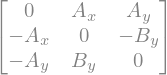

In [18]:
F(i, j).replace_with_arrays(repl, [i,j])

O el tensor mixto

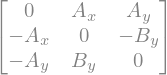

In [19]:
F(i, -j).replace_with_arrays(repl, [i,-j])

Para calcular $F_{ i j}F^{i j }$

In [20]:
(F(i,j)*F(-i,-j)).replace_with_arrays(repl, [])

Para calcular $F^{i}_{j}F^{j}_k$

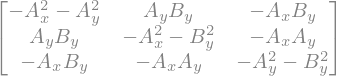

In [21]:
(F(i,-j)*F(j, -k)).replace_with_arrays(repl, [])

Definimos las componentes de la $\delta$ de Kronecker

In [22]:
D = TensorHead('D', [gij, gij])
repl.update({D(i, j): [
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]})

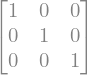

In [23]:
D(i, -j).replace_with_arrays(repl, [i,-j])
D(-i, -j).replace_with_arrays(repl, [-i,-j])

Para calcular $F^{i j}\delta_{i k}$

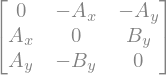

In [24]:
(F(i,j)*D(-i,-k)).replace_with_arrays(repl, [])

La identidad $\delta^{i j}\delta_{i j}$

In [25]:
(D(i,j)*D(-i,-j)).replace_with_arrays(repl, [])